# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [3]:
# Carregar as bases de treino e teste
x_train = pd.read_csv('x_train_balanced.csv', delimiter=',')
y_train = pd.read_csv('y_train_balanced.csv', delimiter=',')
x_test = pd.read_csv('x_test.csv', delimiter=',')
y_test = pd.read_csv('y_test.csv', delimiter=',')

In [4]:
x_test

,Age,Income,Number of Children,Gender_encoded,MaritalStatus_encoded,HomeOwnership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.0,5500000.0,0,0,1,1,1,0,0,0
1,48.0,8750000.0,1,0,0,0,0,1,0,0
2,26.0,5500000.0,1,0,0,0,1,0,0,0
3,39.0,6250000.0,2,0,0,0,1,0,0,0
4,35.0,9000000.0,1,0,0,0,0,1,0,0
5,25.0,5500000.0,0,0,1,1,1,0,0,0
6,48.0,8250000.0,1,0,0,0,0,1,0,0
7,48.0,8250000.0,1,0,0,0,0,1,0,0
8,36.0,9500000.0,2,0,0,0,0,0,0,1
9,36.0,9500000.0,1,0,0,0,0,0,1,0


In [5]:
x_train

,Age,Income,Number of Children,Gender_encoded,MaritalStatus_encoded,HomeOwnership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,26.000000,4.500000e+06,0,0,1,1,0,0,0,0
1,29.000000,2.750000e+06,0,0,1,1,0,0,1,0
2,25.000000,6.250000e+06,0,0,1,1,1,0,0,0
3,29.000000,6.800000e+06,2,0,0,0,0,1,0,0
4,31.000000,6.500000e+06,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
247,27.139269,3.680365e+06,0,0,1,1,0,0,0,0
248,27.000000,3.750000e+06,0,0,1,1,0,0,1,0
249,28.510747,2.994626e+06,0,0,1,1,0,0,0,0
250,27.417411,3.541294e+06,0,0,1,1,0,0,0,0


In [6]:
y_test

,Credit Score_encoded
0,0
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [7]:
y_train

,Credit Score_encoded
0,0
1,2
2,0
3,0
4,0
...,...
247,2
248,2
249,2
250,2


In [8]:
# Verificar se as classes estão balanciadas em y_test
test_balance = y_test.value_counts()
print('Balanceamento em y_test')
print(test_balance)


Balanceamento em y_test
Credit Score_encoded
1                       29
0                        6
2                        6
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

O modelo foi iniciado com pré processamento, tratamento da base de crédito, balanciamento das classes e  transformação das variáveis categóricas. Seguindo com a separação das bases de treino e teste e a aplicação na base já tratada o algoritmo de Naive Bayes, e então avaliar os resultados das previsões aplicando na base o algoritmo da árvore de decisão para realizar previsões melhores de que encontramos em Naive Bayes. Contudo tomar decisões informadas com base nos dados, útil para problemas de classificação ou regressão.

Na etapa de treinamento do modelo, calculamos a diminuição na impureza (Gini , Entropia), causada em cada atributo, cada divisão para descobrir quais os melhore atributos do ramo.

Caso haja necessidade de melhoria do modelo, ajustaremos os hiperparâmetros, usando um conceito poda da árvore de decisão, removendo partes que não são consideradas úteis ou que podem levar ao overfitting, é importante avaliar as features na nossa árvore.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [9]:
# Implementar nosso algoritmo na base de treino
arvore_churn = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_churn.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
print(arvore_churn.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [11]:
previsoes = arvore_churn.predict(x_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


Com o desempenho da acurácia perfeito, podemos inferir que houve overfitting no nosso dados de treinamento, o que pode ocasionar problemas futuros, um super ajuste nos dados de treinamento e uma má generalização nos dados de teste, vamos verificar o desempenho no modelo de teste.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [12]:
# Implementar nosso algoritmo na base de teste
arvore_churn = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_churn.fit(x_test, y_test)

DecisionTreeClassifier(random_state=0)

In [13]:
previsoes = arvore_churn.predict(x_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [14]:
relatorio = classification_report(y_test, previsoes)
print('Relatório de Classificação:')
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00         6

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



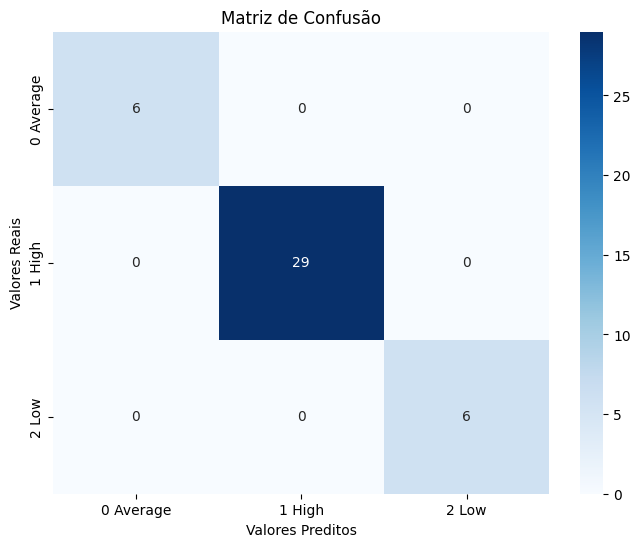

In [15]:
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotando matriz de confusão como mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 Average', '1 High', '2 Low'], yticklabels=['0 Average', '1 High', '2 Low'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

Considerando que o modelo teve um desempenho alto, previsão de 100% tanto com a acurácia quanto as outras métricas aplicadas nos modelos de treino de teste, podemos acreditar que não houve um problema no modelo.



# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

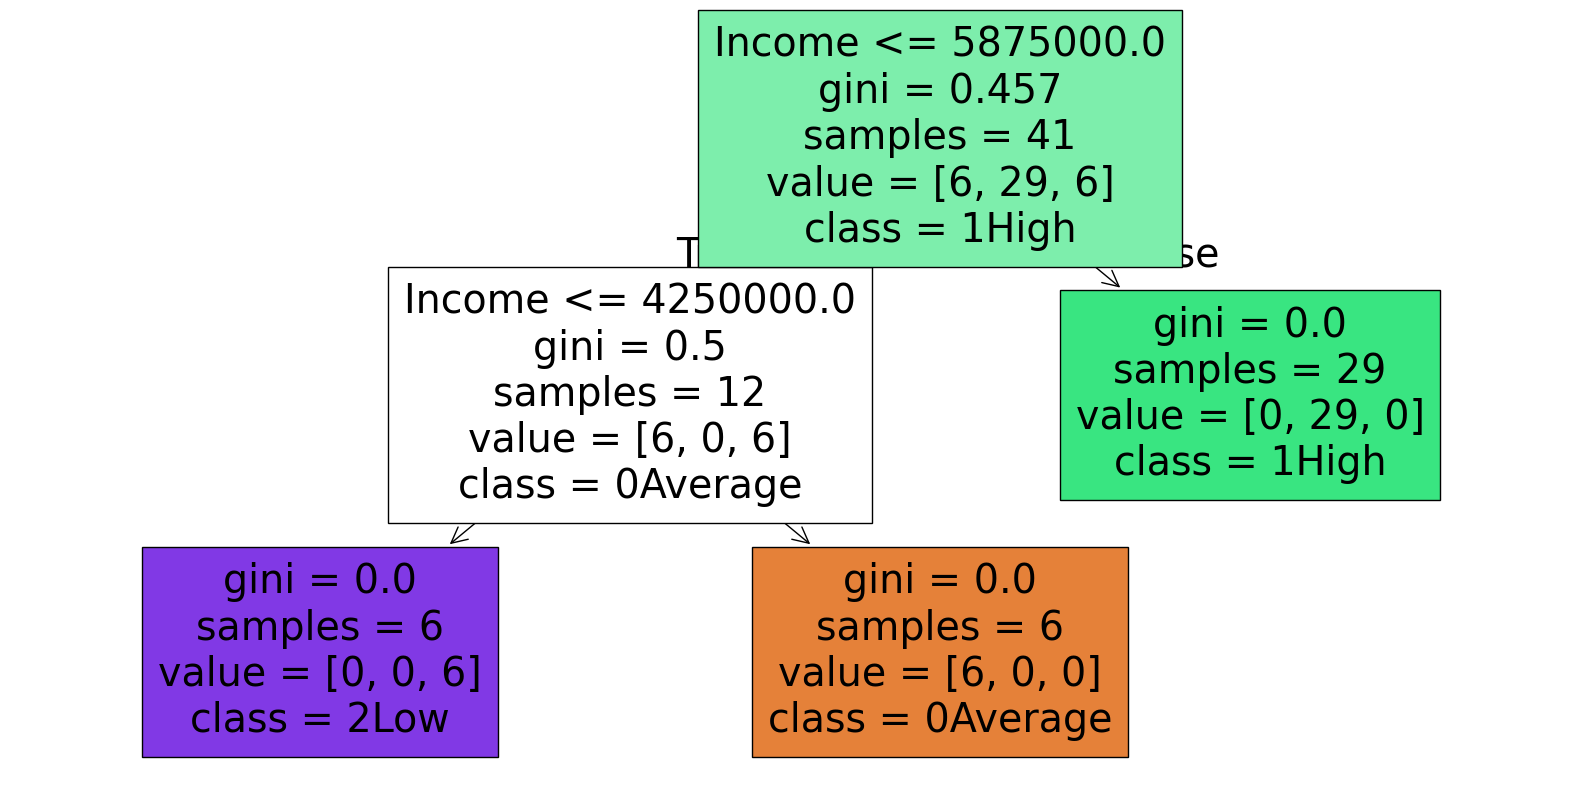

In [16]:
# Plotando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(arvore_churn, filled=True, feature_names=x_train.columns, class_names=['0Average', '1High', '2Low'])
plt.show()


In [17]:
# Obtendo a profundidade da árvore
profundidade = arvore_churn.get_depth()
print("Profundidade da árvore:", profundidade)

Profundidade da árvore: 2


Sim, é possível fazer uma avaliação visual e a profundidade da árvore é de 2.

# 6) Identifique as 2 principais features do modelo.


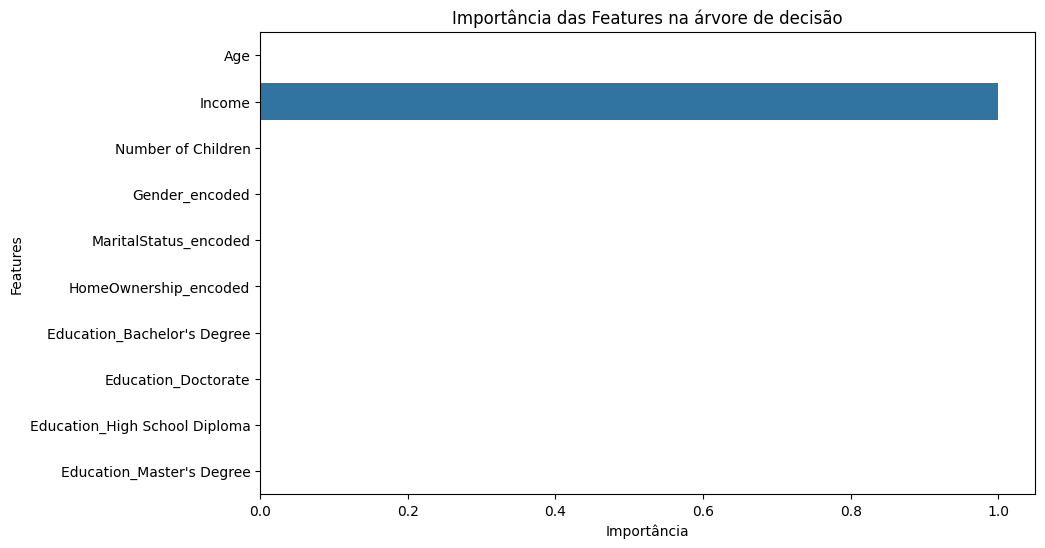

In [20]:
# Obtendo a importância das características do modelo de árvore de decisão
importancias_features = arvore_churn.feature_importances_

# Obtendo os nomes das características
nomes_features = x_train.columns

# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias_features, y=nomes_features)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features na árvore de decisão')
plt.show()

A única feature que o modelo mostrou relevante foi a Income.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [21]:
x_train_reduzido = x_train[['Income',]]
x_test_reduzido = x_test[['Income', ]]


In [23]:
arvore_churn_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_churn_reduzido.fit(x_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
previsoes_reduzido = arvore_churn_reduzido.predict(x_test_reduzido)

In [25]:
relatorio = classification_report(y_test, previsoes_reduzido)
print('Relatório de Classificação:')
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.90      0.95        29
           2       1.00      1.00      1.00         6

    accuracy                           0.93        41
   macro avg       0.89      0.97      0.92        41
weighted avg       0.95      0.93      0.93        41



Rodando nosso modelo agora só com principal feature todas as seguintes informacões:



*   Para Average a precisão diminuiu para 67%, ou seja, 67% das amostras previstas para Average, realmente fazem parte dela.
*   Para High a revocação diminui para 90%, ou seja, o modelo identificou corretamente 90% das amostras.





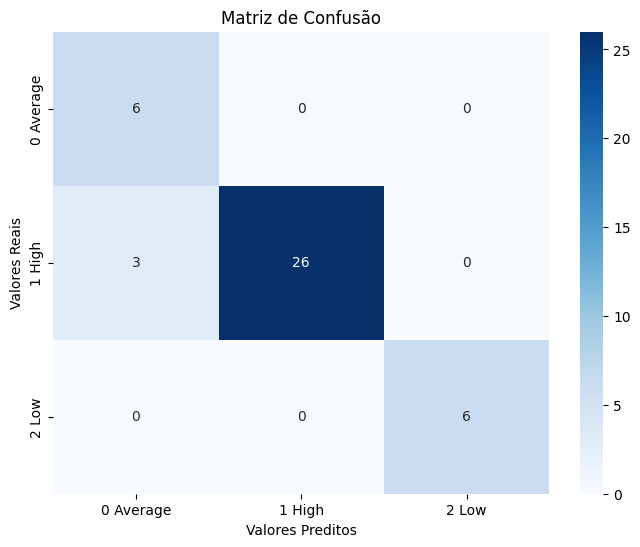

In [26]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)

# Plotando a matriz de confusão com o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 Average', '1 High', '2 Low'], yticklabels=['0 Average', '1 High', '2 Low'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

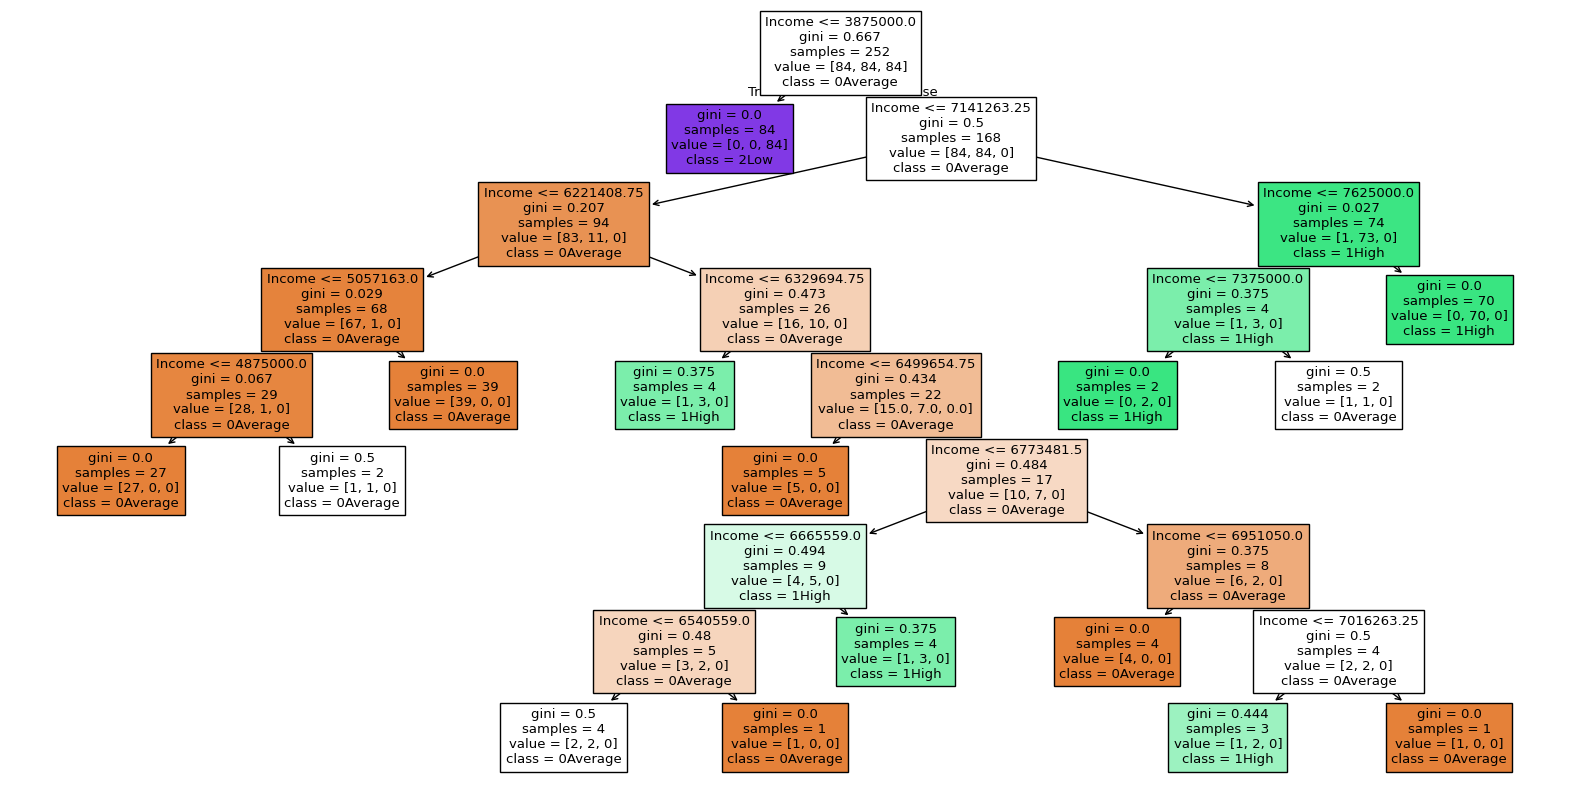

In [27]:
# Plotando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(arvore_churn_reduzido, filled=True, feature_names=x_train_reduzido.columns, class_names=['0Average', '1High', '2Low'])
plt.show()

Apesar da dimunuição das métricas com a feature mais relevante, o desempenho do modelo se manteve muit alto. Acredito que o modelo ficou mais realista e confiável.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Considerando todas as métricas e features, obtivemos valores superios na Árvore de Decisão em relação ao Naive Bayes. Entretando, quando o modelo de Árvore de Decisão é rodado somente com a feature mais relevante os valores são semelhantes ao de Naive Bayes, trazendo métricas mais realistas, mas mesmo assim tendo um desempenho superior.